YouTube video = https://www.youtube.com/watch?v=qFJeN9V1ZsI&t

**DeepLizard**
- Fundamentals: https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU
- Keras: https://deeplizard.com/learn/video/RznKVRTFkBY

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
test_labels = []
test_samples = []

### Example data:

- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- 2100 participants. Half <65 and half >65.
- ~ 95% >= 65 experienced side effects.
- ~ 95% < 65 had no side effects.
- 1 = side effects
- 0 = no side effects

In [4]:
#This cell creates the training set
for i in range (50):
    # The ~5% of <65 who had side effects.
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The ~5% of >=65 who had no side effects.
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of <65 who had no side effects.
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #The ~95% of >=65 who had side effects.
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
#This cell creates the test set for final evaluation
for i in range (10):
    # The ~5% of <65 who had side effects.
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The ~5% of >=65 who had no side effects.
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of <65 who had no side effects.
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #The ~95% of >=65 who had side effects.
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [6]:
#np.unique returns a tuple. When `return_counts = True` the second element is the counts of each value.
unique_counts0 = np.unique(train_samples, return_counts = True)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [10]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [11]:
unique_counts1 = np.unique(scaled_train_samples, return_counts = True)

In [12]:
unique_counts1[1] == unique_counts0[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, Recall

In [14]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax') #Softmax includes output probability.
])

2023-07-20 10:35:41.959420: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
#Split occures before the shuffle. Must shuffle prior to this step if using the `validation_split` parameter.
#You could also specify the validation set with the `validation_data` parameter.
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6559 - accuracy: 0.5386 - val_loss: 0.6390 - val_accuracy: 0.5905 - 570ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6253 - accuracy: 0.6185 - val_loss: 0.6090 - val_accuracy: 0.6619 - 144ms/epoch - 762us/step
Epoch 3/30
189/189 - 0s - loss: 0.5876 - accuracy: 0.7011 - val_loss: 0.5678 - val_accuracy: 0.7286 - 142ms/epoch - 750us/step
Epoch 4/30
189/189 - 0s - loss: 0.5491 - accuracy: 0.7635 - val_loss: 0.5306 - val_accuracy: 0.8095 - 140ms/epoch - 741us/step
Epoch 5/30
189/189 - 0s - loss: 0.5122 - accuracy: 0.8058 - val_loss: 0.4959 - val_accuracy: 0.8190 - 142ms/epoch - 751us/step
Epoch 6/30
189/189 - 0s - loss: 0.4776 - accuracy: 0.8307 - val_loss: 0.4635 - val_accuracy: 0.8524 - 139ms/epoch - 734us/step
Epoch 7/30
189/189 - 0s - loss: 0.4454 - accuracy: 0.8550 - val_loss: 0.4339 - val_accuracy: 0.8524 - 140ms/epoch - 742us/step
Epoch 8/30
189/189 - 0s - loss: 0.4158 - accuracy: 0.8751 - val_loss: 0.4075 - val_accuracy: 0.8714 - 142ms/epoch

### Predict

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
#List: First item is the prediction for not having a side effect, the second is for having a side effect.
for i in predictions:
    print(i)

[0.01590617 0.98409384]
[0.01590617 0.98409384]
[0.7762501  0.22374989]
[0.03770483 0.9622952 ]
[0.80117 0.19883]
[0.05971816 0.94028187]
[0.9647257  0.03527435]
[0.9081331 0.0918669]
[0.96015024 0.03984976]
[0.96426255 0.03573744]
[0.6888857  0.31111434]
[0.7491847 0.2508153]
[0.9642893  0.03571068]
[0.2991111 0.7008889]
[0.02761141 0.9723886 ]
[0.02761141 0.9723886 ]
[0.6559364 0.3440636]
[0.02360237 0.97639763]
[0.9645719  0.03542806]
[0.9631811  0.03681893]
[0.02016335 0.97983664]
[0.47423574 0.5257642 ]
[0.9637866  0.03621341]
[0.9648313  0.03516867]
[0.04751458 0.95248544]
[0.33140066 0.66859937]
[0.43712825 0.56287175]
[0.02360237 0.97639763]
[0.07801747 0.9219825 ]
[0.9633813  0.03661867]
[0.9637392  0.03626074]
[0.11415843 0.8858416 ]
[0.2140699  0.78593004]
[0.84461534 0.15538472]
[0.2991111 0.7008889]
[0.5488947  0.45110536]
[0.05971816 0.94028187]
[0.9283651  0.07163489]
[0.5856189 0.4143811]
[0.89491963 0.10508039]
[0.13019073 0.8698093 ]
[0.823944   0.17605609]
[0.9653342

In [20]:
#This assigns a 1 or 0 based on if the first or second item is larger
rounded_predictions = np.argmax(predictions, axis=-1)

### Confusion Matrix

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting "normalize = True".
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[198  12]
 [  9 201]]


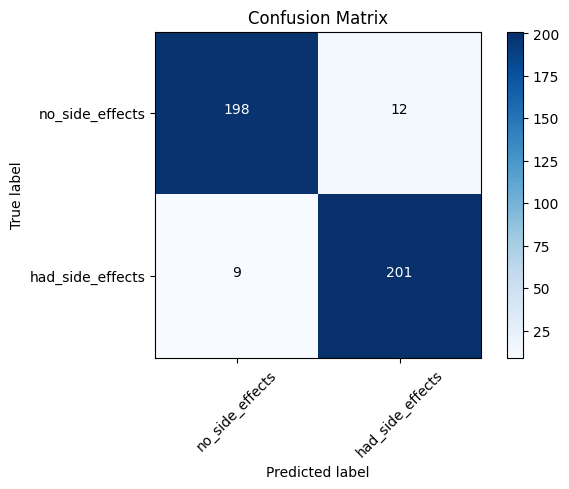

In [24]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

# Save and Load a Model

#### 1. model.save()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Checks to see if file exists.
#If not, then saves.
import os.path
if os.path.isfile("models/medical_trial_model.h5") == False:
    model.save("models/medical_trial_model.h5")

this save functions saves:
- The architechture of the mdoel, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

#### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following functionto save the architecture only.

In [27]:
# save to JSON
json_string = model.to_json()

# save to YAML
#yaml_string = model.to_yaml()

In [28]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [29]:
# Model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

#Model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# yaml_model = model_from_yaml(yaml_string)

In [30]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. model.save_weights()

If you only need to save the weights of a model, you can use the follwoing function:

In [31]:
# Checks for file.
# If none, then saves to disk.

if os.path.isfile("models/med_model_weights.h5") == False:
    model.save_weights("models/med_model_weights.h5")

In [32]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [33]:
model2.load_weights("models/med_model_weights.h5")

In [34]:
model2.get_weights()

[array([[ 0.3386581 , -0.29653707,  0.33994353,  0.00567338,  0.7199534 ,
         -0.02308589,  0.12644269,  0.54679286, -0.11625743,  0.6224729 ,
          0.40083438, -0.12676091, -0.12311587,  0.22803581, -0.01042485,
         -0.20366511]], dtype=float32),
 array([-0.08982466,  0.        , -0.05307084, -0.00673931, -0.1495899 ,
         0.        ,  0.26540646, -0.14802802,  0.        , -0.14542925,
        -0.1154863 ,  0.20595251,  0.        ,  0.24806799,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.16585705, -0.08608983,  0.55396754, -0.30602458,  0.19031878,
          0.3106066 , -0.0163888 ,  0.18630174, -0.4848213 ,  0.15884414,
          0.31066954,  0.16323881,  0.13657096,  0.00776539, -0.09082092,
         -0.04166635, -0.19126473, -0.17952113, -0.2547322 ,  0.431415  ,
         -0.21775784, -0.18978606,  0.4963359 , -0.04178394, -0.04822761,
         -0.00577813, -0.16693144, -0.27294695, -0.11485571,  0.2603798 ,
          0.2839745 ,  0.16077897],
 

Stopped at: 1:01:26